# Bank Term Deposit Subscription Prediction Dataset

Title: Bank Term Deposit Subscription Prediction Dataset
Subtitle: Predict whether a client will subscribe to a bank term deposit

Description:
This dataset contains information about clients of a Portuguese banking institution. The goal is to predict whether a client will subscribe to a bank term deposit (variable y). The data was obtained from a direct marketing campaign, and each entry corresponds to a single client.

Dataset Content:
The dataset contains 45,211 entries with 17 attributes. The attributes represent client information and campaign details, and they include both categorical and numerical data.

- age: Age of the client (numeric)
- job: Type of job (categorical: "admin.", "blue-collar", "entrepreneur", etc.)
- marital: Marital status (categorical: "married", "single", "divorced")
- education: Level of education (categorical: "primary", "secondary", "tertiary", "unknown")
- default: Has credit in default? (categorical: "yes", "no")
- balance: Average yearly balance in euros (numeric)
- housing: Has a housing loan? (categorical: "yes", "no")
- loan: Has a personal loan? (categorical: "yes", "no")
- contact: Type of communication contact (categorical: "unknown", "telephone", "cellular")
- day: Last contact day of the month (numeric, 1-31)
- month: Last contact month of the year (categorical: "jan", "feb", "mar", …, "dec")
- duration: Last contact duration in seconds (numeric)
- campaign: Number of contacts performed during this campaign (numeric)
- pdays: Number of days since the client was last contacted from a previous campaign (numeric; -1 means the client was not previously contacted)
- previous: Number of contacts performed before this campaign (numeric)
- poutcome: Outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")
- y: The target variable, whether the client subscribed to a term deposit (binary: "yes", "no")

## Access & Use Information
- This dataset was made available by UCI Machine Learning Repository. The data is provided "as is" without any warranty.
- License: The dataset is available for public use under the Open Data Commons Public Domain Dedication and License (PDDL).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/train.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [35]:
print(df.isnull().sum())

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [36]:
print(df.duplicated().sum())

0


In [37]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


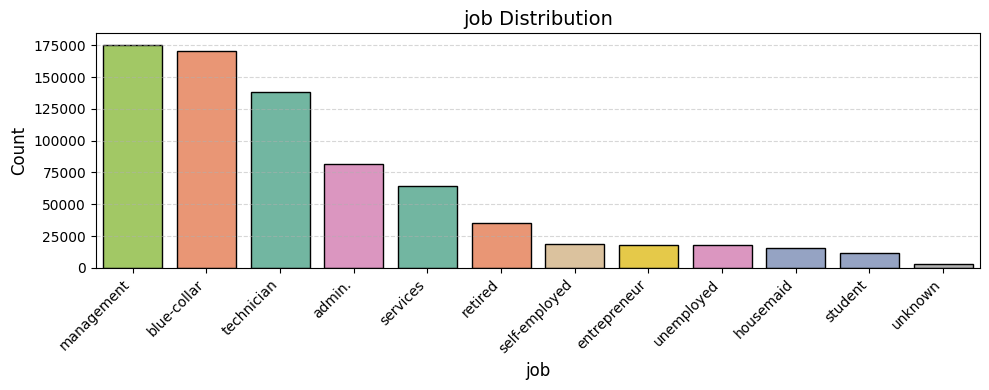


📊 Proportion of Each Category in "job":

job
management       0.234
blue-collar      0.227
technician       0.184
admin.           0.109
services         0.086
retired          0.047
self-employed    0.025
entrepreneur     0.024
unemployed       0.024
housemaid        0.021
student          0.016
unknown          0.004
Name: proportion, dtype: float64 
----------------------------------------


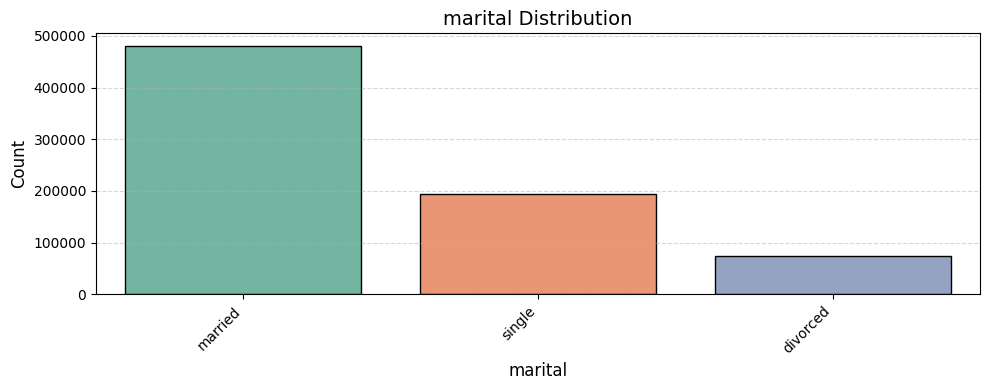


📊 Proportion of Each Category in "marital":

marital
married     0.641
single      0.260
divorced    0.099
Name: proportion, dtype: float64 
----------------------------------------


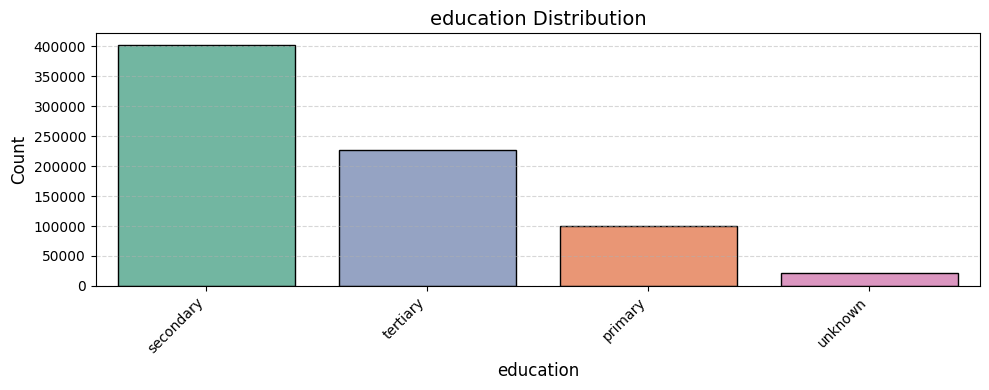


📊 Proportion of Each Category in "education":

education
secondary    0.536
tertiary     0.303
primary      0.133
unknown      0.028
Name: proportion, dtype: float64 
----------------------------------------


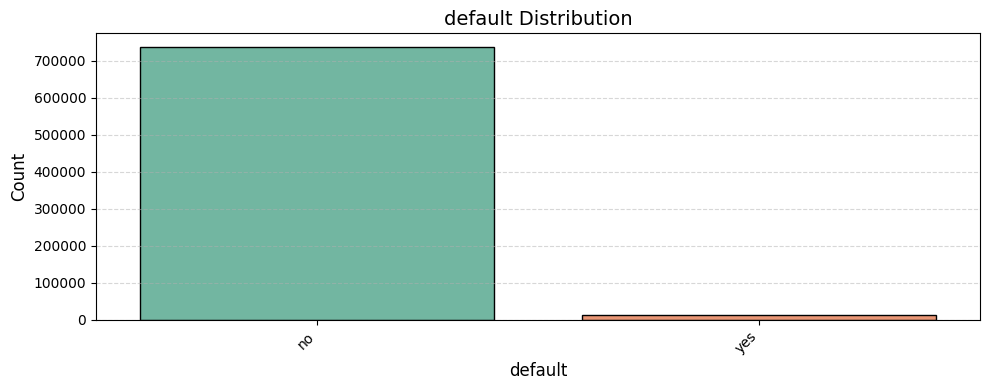


📊 Proportion of Each Category in "default":

default
no     0.983
yes    0.017
Name: proportion, dtype: float64 
----------------------------------------


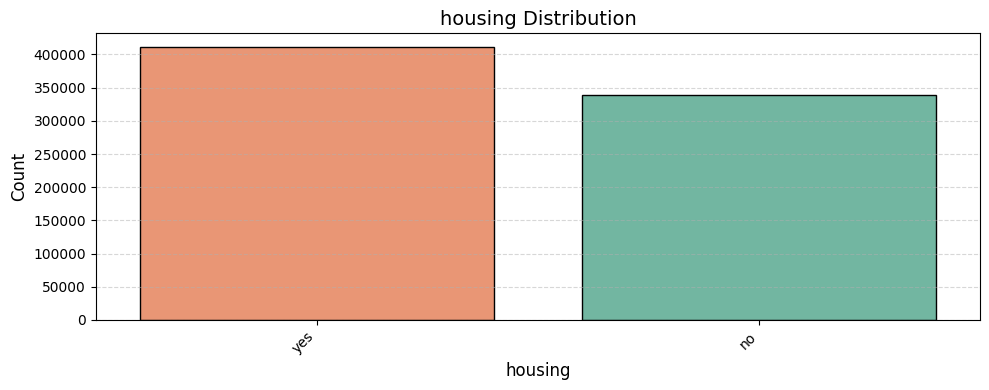


📊 Proportion of Each Category in "housing":

housing
yes    0.548
no     0.452
Name: proportion, dtype: float64 
----------------------------------------


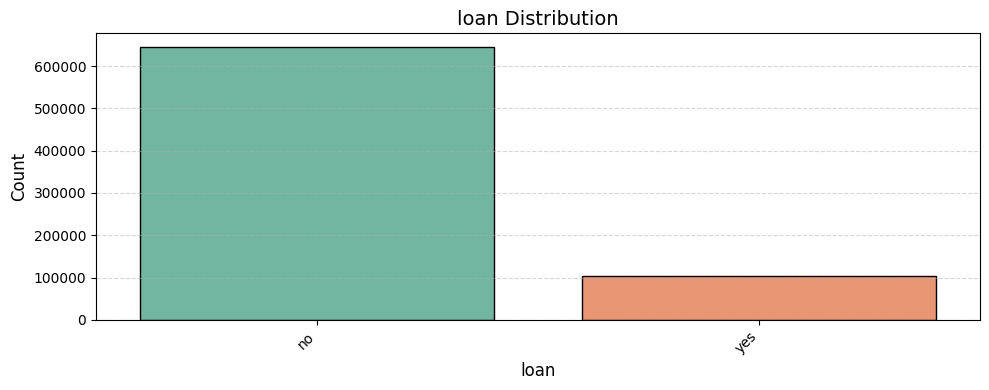


📊 Proportion of Each Category in "loan":

loan
no     0.86
yes    0.14
Name: proportion, dtype: float64 
----------------------------------------


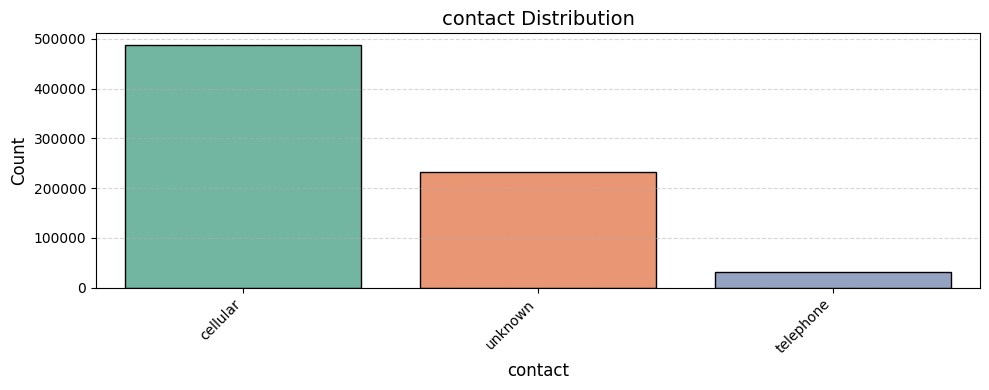


📊 Proportion of Each Category in "contact":

contact
cellular     0.649
unknown      0.309
telephone    0.042
Name: proportion, dtype: float64 
----------------------------------------


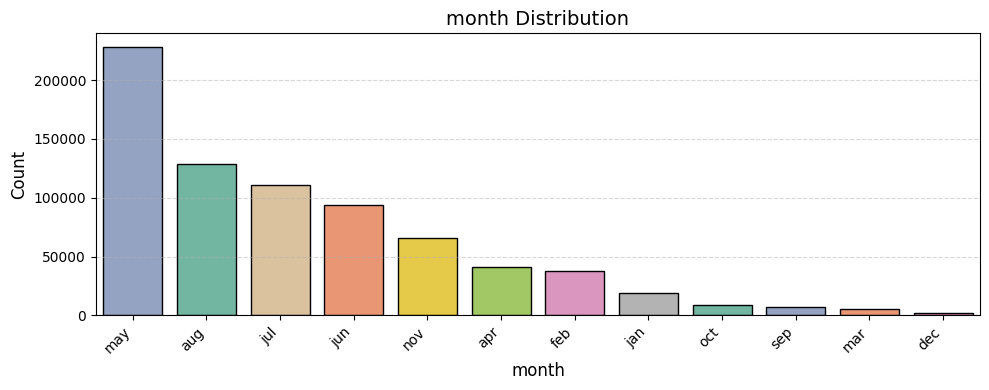


📊 Proportion of Each Category in "month":

month
may    0.305
aug    0.172
jul    0.148
jun    0.125
nov    0.088
apr    0.055
feb    0.050
jan    0.025
oct    0.012
sep    0.010
mar    0.008
dec    0.003
Name: proportion, dtype: float64 
----------------------------------------


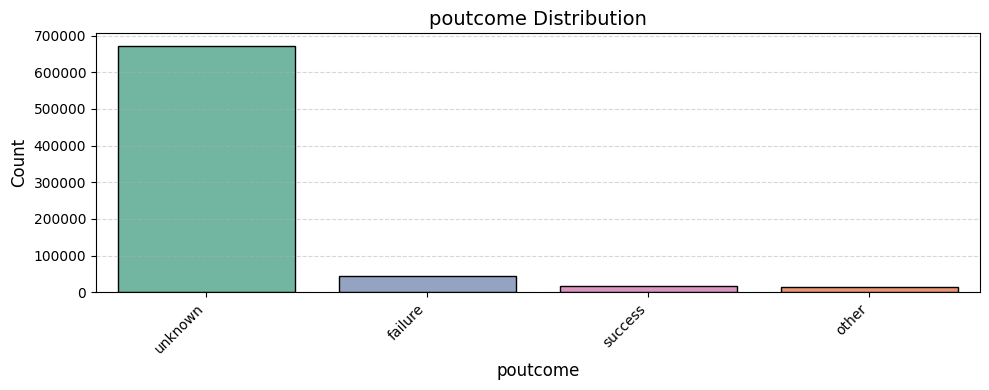


📊 Proportion of Each Category in "poutcome":

poutcome
unknown    0.897
failure    0.060
success    0.024
other      0.020
Name: proportion, dtype: float64 
----------------------------------------


In [38]:
# Distribution of categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(
        data=df,
        x=col,
        hue=col,
        order=df[col].value_counts().index,
        palette='Set2',
        edgecolor='black',
        legend=False
    )
    plt.title(f'{col} Distribution', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Print Category Proportions
    print(f'\n📊 Proportion of Each Category in "{col}":\n')
    print(df[col].value_counts(normalize=True).round(3), '\n' + '-'*40)

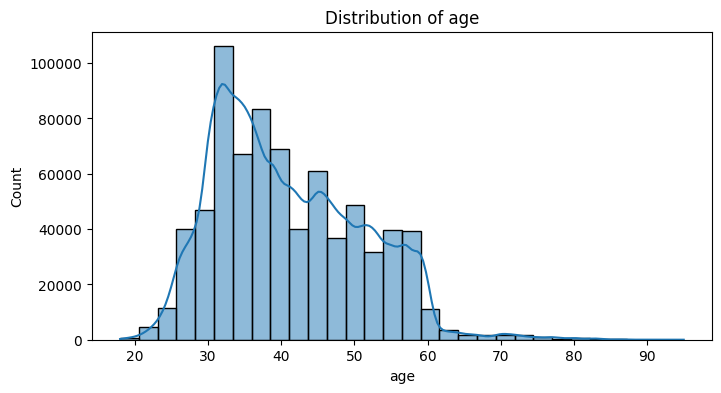


📊 Descriptive Stats for age:

count    750000.000000
mean         40.926395
std          10.098829
min          18.000000
25%          33.000000
50%          39.000000
75%          48.000000
max          95.000000
Name: age, dtype: float64 
----------------------------------------


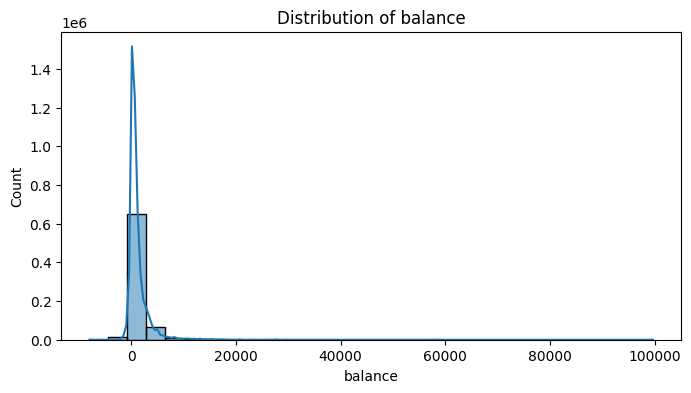


📊 Descriptive Stats for balance:

count    750000.000000
mean       1204.067397
std        2836.096759
min       -8019.000000
25%           0.000000
50%         634.000000
75%        1390.000000
max       99717.000000
Name: balance, dtype: float64 
----------------------------------------


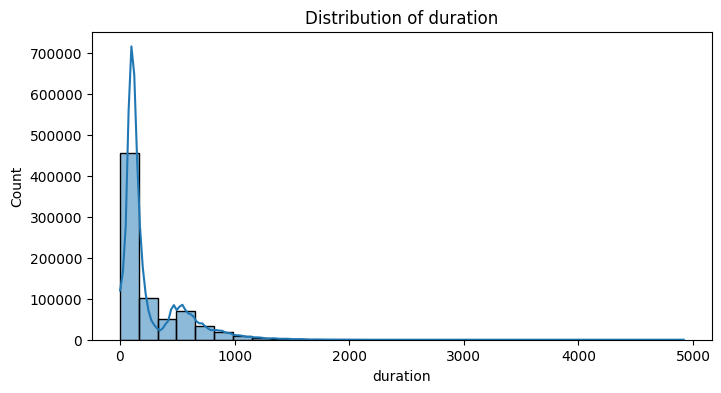


📊 Descriptive Stats for duration:

count    750000.000000
mean        256.229144
std         272.555662
min           1.000000
25%          91.000000
50%         133.000000
75%         361.000000
max        4918.000000
Name: duration, dtype: float64 
----------------------------------------


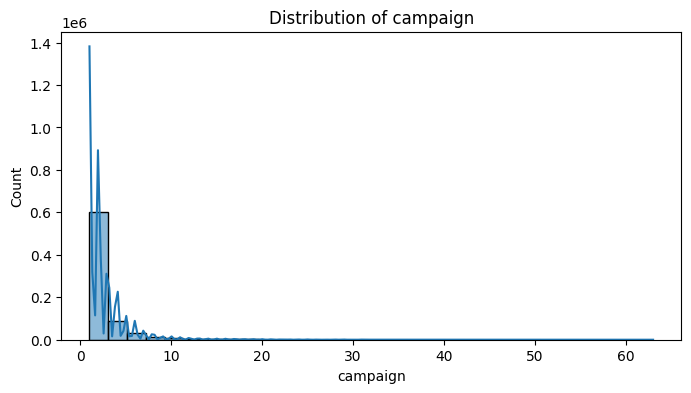


📊 Descriptive Stats for campaign:

count    750000.000000
mean          2.577008
std           2.718514
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          63.000000
Name: campaign, dtype: float64 
----------------------------------------


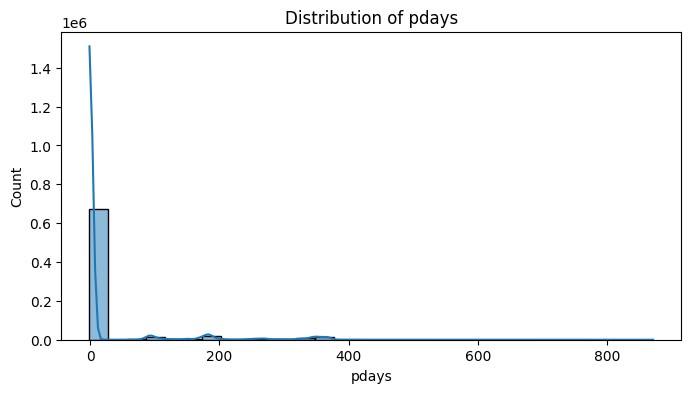


📊 Descriptive Stats for pdays:

count    750000.000000
mean         22.412733
std          77.319998
min          -1.000000
25%          -1.000000
50%          -1.000000
75%          -1.000000
max         871.000000
Name: pdays, dtype: float64 
----------------------------------------


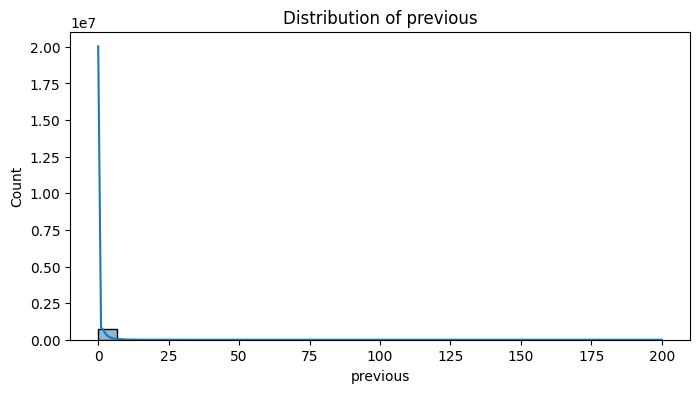


📊 Descriptive Stats for previous:

count    750000.000000
mean          0.298545
std           1.335926
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         200.000000
Name: previous, dtype: float64 
----------------------------------------


In [39]:
# Distribution of numerical variables
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

    # Print descriptive statistics
    print(f'\n📊 Descriptive Stats for {col}:\n')
    print(df[col].describe(), '\n' + '-'*40)

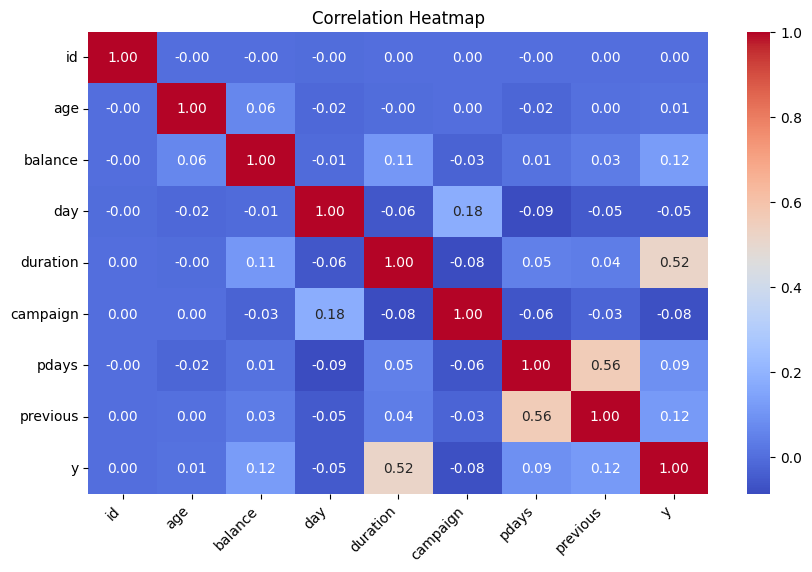

In [40]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10,6))
num_cols = df.select_dtypes(include=['int', 'float']).columns
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.show()

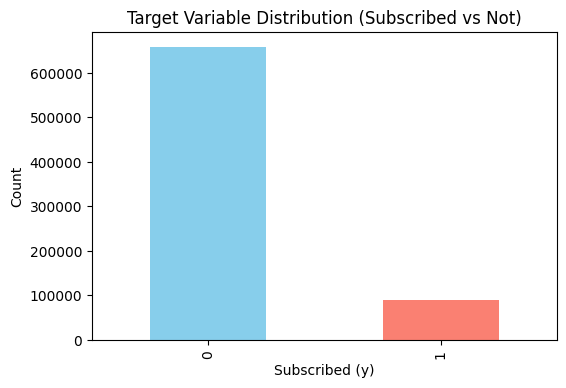

Subscription Rate (%):
y
0    87.934933
1    12.065067
Name: proportion, dtype: float64


In [41]:
# Distribution of target variable 'y'
plt.figure(figsize=(6,4))
df['y'].value_counts().plot(kind="bar", color=["skyblue","salmon"])
plt.title("Target Variable Distribution (Subscribed vs Not)")
plt.xlabel("Subscribed (y)")
plt.ylabel("Count")
plt.show()

print("Subscription Rate (%):")
print(df['y'].value_counts(normalize=True)*100)

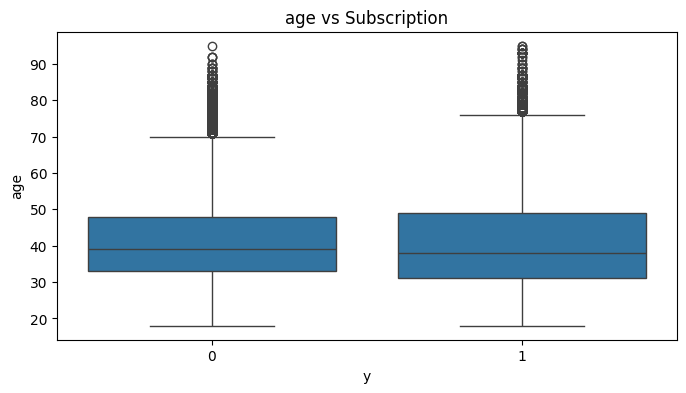

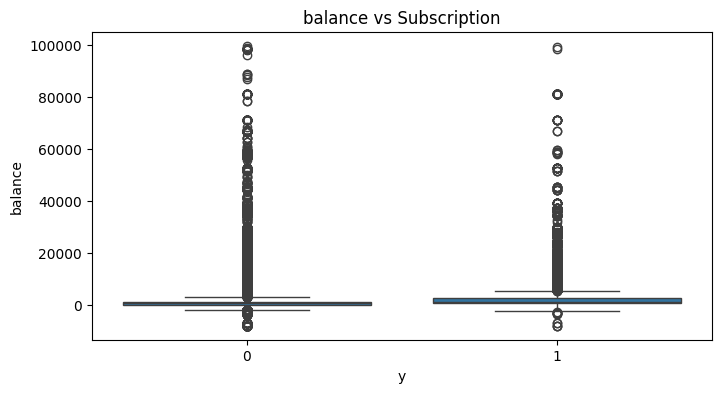

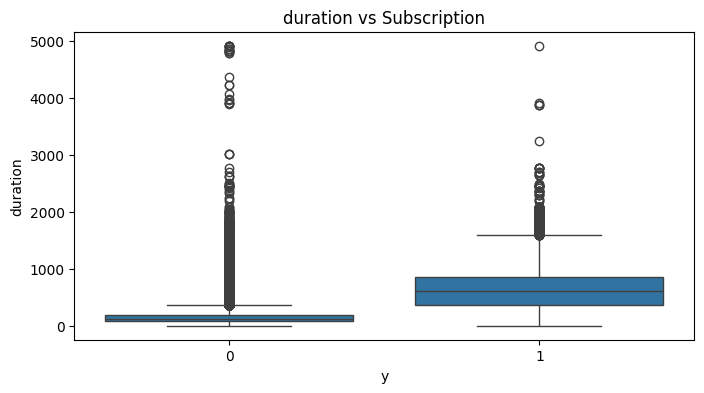

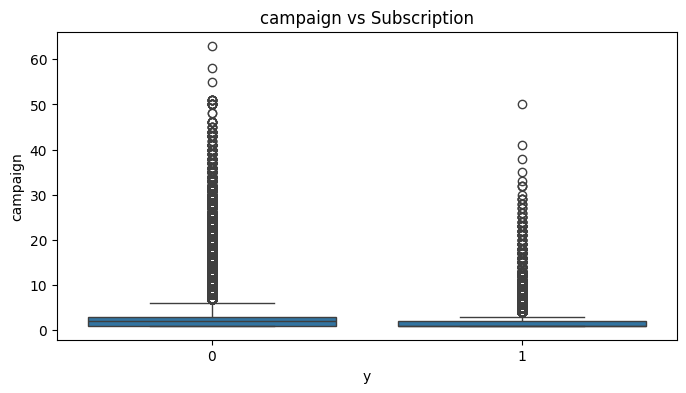

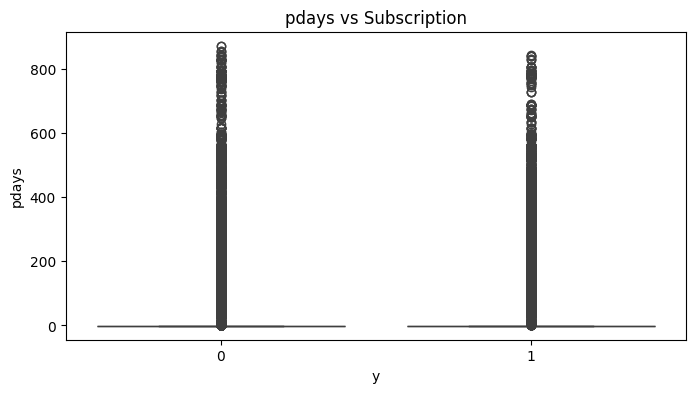

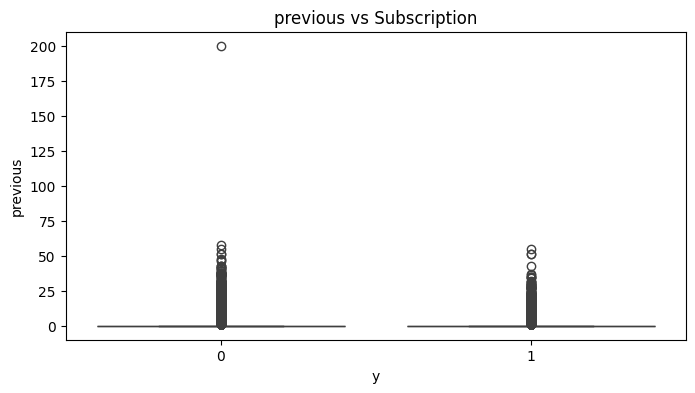

In [42]:
# Box plots of numerical features vs target variable 'y'
num_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in num_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="y", y=col, data=df)
    plt.title(f"{col} vs Subscription")
    plt.show()

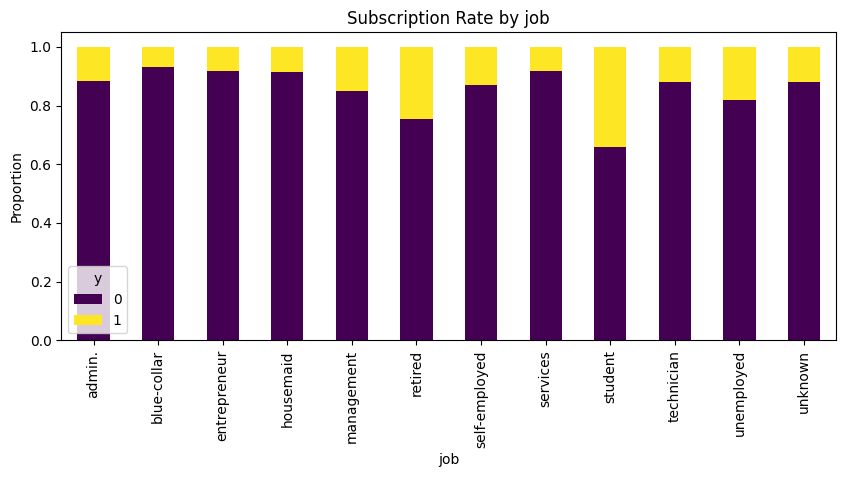

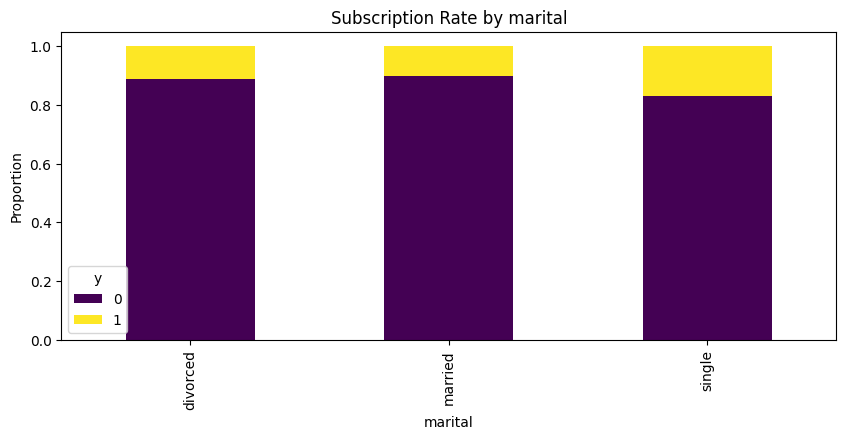

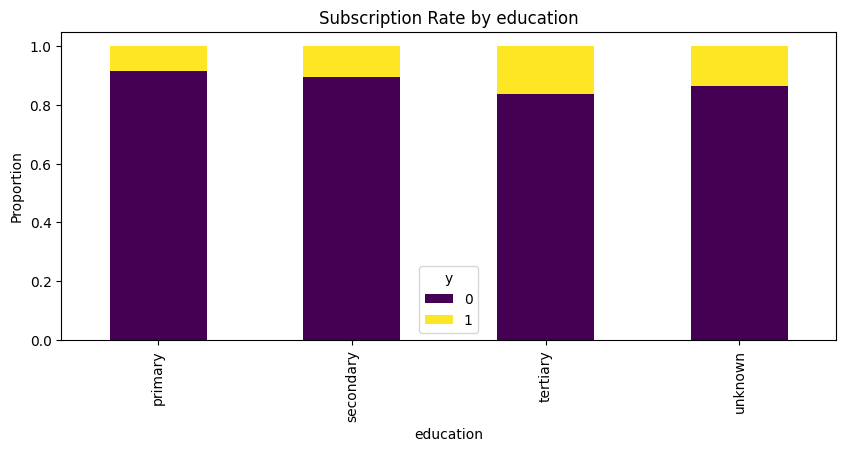

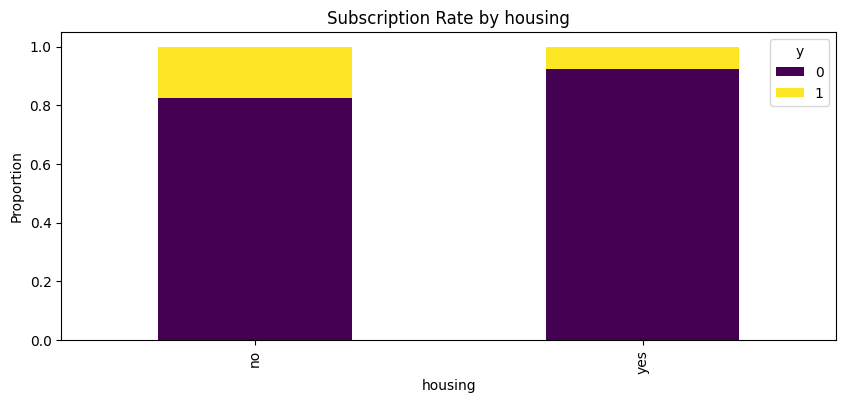

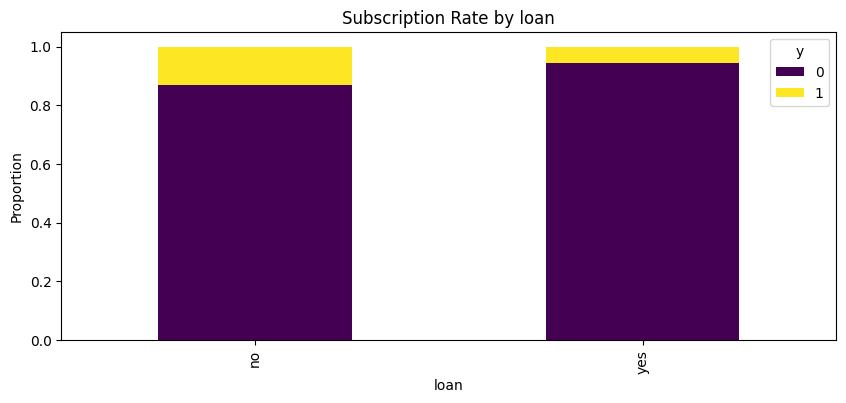

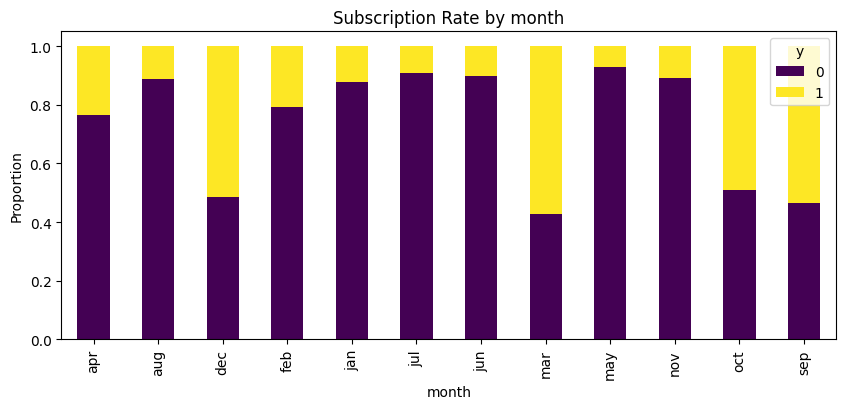

In [43]:
# Stacked bar plots for categorical features vs target variable 'y'
cat_features = ['job', 'marital', 'education', 'housing', 'loan', 'month']

for col in cat_features:
    ct = pd.crosstab(df[col], df['y'], normalize='index')
    ct.plot(kind="bar", stacked=True, figsize=(10,4), colormap="viridis")
    plt.title(f"Subscription Rate by {col}")
    plt.ylabel("Proportion")
    plt.show()

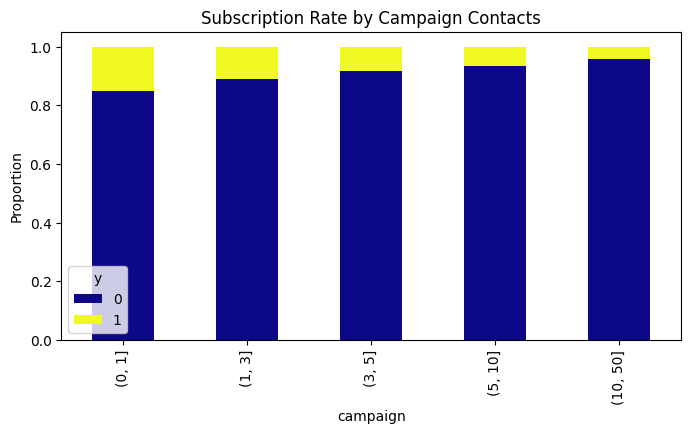

In [44]:
# Special case: campaign (numerical but discrete with few values)
campaign_bins = pd.cut(df['campaign'], [0,1,3,5,10,50])
ct = pd.crosstab(campaign_bins, df['y'], normalize='index')
ct.plot(kind="bar", stacked=True, figsize=(8,4), colormap="plasma")
plt.title("Subscription Rate by Campaign Contacts")
plt.ylabel("Proportion")
plt.show()

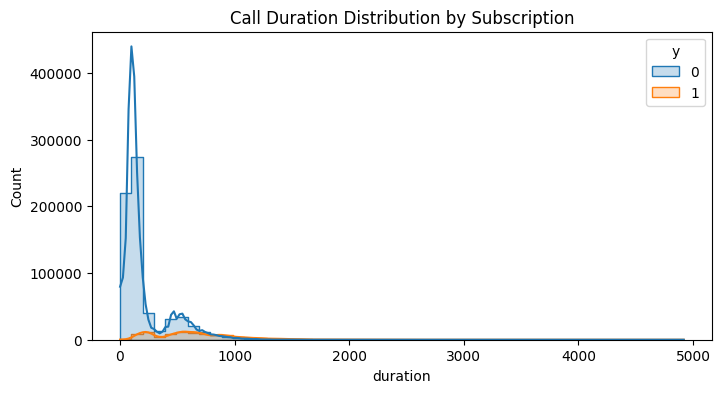

In [45]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="duration", hue="y", kde=True, bins=50, element="step")
plt.title("Call Duration Distribution by Subscription")
plt.show()

# Baseline Modeling

- Baseline Model: Logistic Regression
- Evaluation Metrics: Accuracy, Precision, Recall, F1-score, ROC-AUC


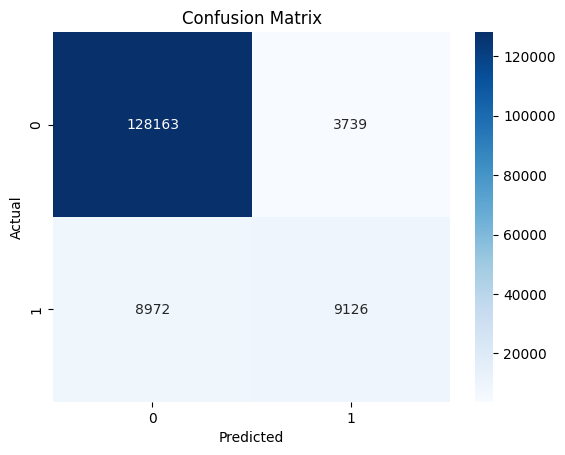

Accuracy: 0.91526
Precision: 0.709
Recall: 0.504
F1-score: 0.589
ROC-AUC: 0.942


Confusion Matrix:
 [[128163   3739]
 [  8972   9126]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    131902
           1       0.71      0.50      0.59     18098

    accuracy                           0.92    150000
   macro avg       0.82      0.74      0.77    150000
weighted avg       0.91      0.92      0.91    150000



In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target
X = df.drop('y', axis=1)
y = df['y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.3f}\n")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


## EDA Analysis and Conclusions

The baseline logistic regression model achieves high ROC-AUC (0.94) and good overall accuracy (91.5%), but recall for subscribers is moderate (50%). This indicates that while the model can distinguish well between classes, it misses about half of potential subscribers. Features such as call duration, previous contacts, and campaign characteristics are likely driving this predictive power.

To improve performance, I recommend:

- Threshold tuning: Adjust the classification threshold to favor detecting subscribers (increase recall) while monitoring precision.

- Ensemble models: Train Random Forest or Gradient Boosting models, which can better capture nonlinear relationships and interactions between features like duration, campaign contacts, and previous responses.

- Addressing imbalance: Consider resampling methods (SMOTE, undersampling) or class weighting to improve minority class prediction.

- Feature engineering: Create derived features such as call duration per campaign, age groups, or interaction terms to enhance predictive power.

Implementing these steps is expected to increase recall and F1-score, allowing the bank to better identify clients likely to subscribe and optimize campaign targeting.